# Tamaños de cache
### <font color="BLUE">LEE ATENTAMENTE ESTE `notebook` EJECUTANDO SUS CELDAS. COMPLETA Y CONTESTA LAS CELDAS EN</FONT> <font color="red">ROJO</FONT>

Asegúrate de que estás ejecutando el código de este _notebook_ en la máquina y desde el directorio que quieres

**$\rightarrow$ ejecuta** (`shift` + `return`)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

!echo "HOSTNAME     " `hostname`; 
!echo "CURRENT DIR  " `pwd`

In [9]:
%%writefile files/cache_size_example.c

#include <stdlib.h>
#include "rlxutils.h"

int main(int argc, char **argv) {
  struct timespec tsi, tsf;

  long KB = 1024;
  long N = 20;
  long P2 = 16;

  long i,j,l,k;

  double time_difs[N];

    char *fname = "files/cache_size.data";
    printf ("writing to file %s\n", fname);
    FILE *f = fopen(fname, "w");

    fprintf(f, "iteration array_size total_elapsed_time\n");

    for (j=1; j<P2; j++) {
        long arrayLength = power(2,j-1)*KB;

        long lengthMod = arrayLength - 1;
        long steps =  16 * 1024 * 1024;

        for (l=0;l<N;l++)time_difs[l]=0;

        for (l=0;l<N; l++) {

            char *arr = malloc(arrayLength*sizeof(char));


            current_utc_time(&tsi);
            for (i=0; i<steps; i++) {
                long idx =(i*64) & lengthMod;       
                arr[idx]++;
            }
            current_utc_time(&tsf);


            time_difs[l] = get_time_diff(tsi, tsf);
            free(arr);
        }
        fprintf (f, "%ld %ld %lf\n", j, arrayLength/1024, avg(time_difs,N));
    }
    return 0; 

}


Overwriting files/cache_size_example.c


In [ ]:
!make -f m/Makefile-p1.4 clean all

In [12]:
!./files/cache_size_example

writing to file files/cache_size.data


In [ ]:
file_name="files/cache_size.data"
df = pd.read_csv(file_name, sep=" ")
iteration           = df['iteration']
total_elapsed_time  = df['total_elapsed_time']
array_size          = df['array_size']
df

In [ ]:
ax = plt.figure(figsize=(10,5)).add_subplot(111)
p,  = ax.plot(df.index, total_elapsed_time, linewidth=3, alpha=0.5)
ax.set_xticks(df.index)
ax.set_xticklabels(array_size)
ax.set_xlabel("array size (KB)")
ax.set_ylabel("secs")
ax.legend([p], ["elapsed time"])

# <font color='red'> PREGUNTAS (consulta la referencia más abajo): 
Contesta las siguientes preguntas ejecutando este notebook en **GUANE**
* <font color='red'> ¿Qué tamaños tienen las cachés L1, L2 y L3 en el sistema? **Por chip y total**
* <font color='red'> Busca en internet las especificaciones técnicas del procesador y explica cómo los verificas con los datos obtenidos desde tu sistema operativo
* <font color='red'> ¿Cómo interpretas la gráfica anterior en función de los tamaños de las cachés L1, L2 y L3?

Contesta las siguientes preguntas ejecutando este notebook en **la máquina virtual del curso**
* <font color='red'> ¿qué procesador ves? ¿qué tamaños de caché ves?
* <font color='red'> Si puedes aumenta el número de procesadores virtual de tu máquina virtual y vuelve a ejecutar los comandos más abajo. ¿cuantos procesadores y cores ves?

--- TU RESPUESTA AQUí (double click) ---

### Referencia
con los comandos `lshw` y `lscpu` en Linux obtenemos información de nuestros procesadores.

con el comando `sysctl` obtenemos información similar en MacOS

In [14]:
# ---- usa este comando si estás en Linux
!lshw -class processor; lscpu
# ---- usa este comando si estás en MacOS
#! sysctl -a|grep -i ^hw


  *-cpu
       product: Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz
       vendor: Intel Corp.
       physical id: 1
       bus info: cpu@0
       size: 1600MHz
       capacity: 1600MHz
       width: 64 bits
       capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx rdtscp x86-64 constant_tsc arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc aperfmperf eagerfpu pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm ida arat epb xsaveopt pln pts dtherm tpr_shadow vnmi flexpriority ept vpid fsgsbase smep erms cpufreq
Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                8
On-line CPU(s) list:   0-7
Thread(s) per core:    2
Core(s) per socket:    4
Socket(s):             1
NUMA node(s):          1
Vend

En general las existe una cache **L1** y otra **L2** en cada core, y son compartidas por todos los __threads__ o __hyprthreads__ de cada core. La lógica del procesador se encarga de mantener la coherencia entre las cachés de distintos cores. 

La caché **L3** es compartida por todos los cores de un procesador

---
Especificaciones técnicas de la serie de procesadores **Intel Xeon 5600** [enlace](http://www.intel.com/content/dam/www/public/us/en/documents/datasheets/xeon-5600-vol-1-datasheet.pdf)

---
Esta es una disposición típica de las cachés en un chip multicore

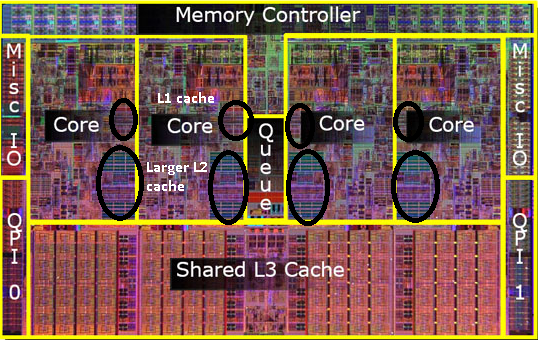

In [6]:
Image(filename='imgs/caches.png')